In [1]:
import pandas as pd

In [2]:
Data=pd.read_csv("Data/Udemy_courses.csv")
#Data.shape
Data.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance


In [3]:
Data.info()
Data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   course_id            3678 non-null   int64  
 1   course_title         3678 non-null   object 
 2   url                  3678 non-null   object 
 3   is_paid              3678 non-null   bool   
 4   price                3678 non-null   int64  
 5   num_subscribers      3678 non-null   int64  
 6   num_reviews          3678 non-null   int64  
 7   num_lectures         3678 non-null   int64  
 8   level                3678 non-null   object 
 9   content_duration     3678 non-null   float64
 10  published_timestamp  3678 non-null   object 
 11  subject              3678 non-null   object 
dtypes: bool(1), float64(1), int64(5), object(5)
memory usage: 247.9+ KB


course_id              0
course_title           0
url                    0
is_paid                0
price                  0
num_subscribers        0
num_reviews            0
num_lectures           0
level                  0
content_duration       0
published_timestamp    0
subject                0
dtype: int64

In [4]:
def column_Range(Col):
    return Data[Col].max()-Data[Col].min()

In [5]:
column_Range('num_subscribers')

268923

In [6]:
"""
Data["Course_topic_index"]= Data["course_title"].str.find('Excel')
Data.head()
for i,rows in Data:
    if rows['Course_topic_index']!=-1:
        rows["Course_topic"]='Excel'
    else:
        rows["Course_topic"]='NA'
Data.head()
"""

'\nData["Course_topic_index"]= Data["course_title"].str.find(\'Excel\')\nData.head()\nfor i,rows in Data:\n    if rows[\'Course_topic_index\']!=-1:\n        rows["Course_topic"]=\'Excel\'\n    else:\n        rows["Course_topic"]=\'NA\'\nData.head()\n'

In [7]:
#Data.drop(['Course_topic', 'Course topic','Course_topic_index'], axis=1)

KeyError: "['Course_topic' 'Course topic' 'Course_topic_index'] not found in axis"

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

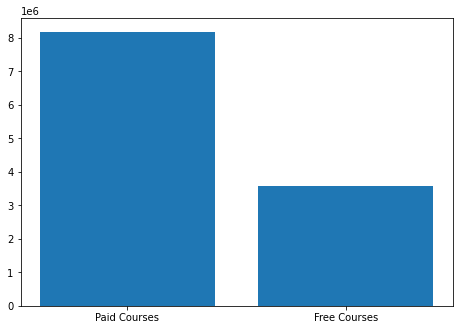

In [9]:
import matplotlib.pyplot as plt
import csv
Xaxis = ['Paid Courses','Free Courses']
PaidSub = Data[Data['is_paid']== True]['num_subscribers'].values.sum()
UnpaidSub = Data[Data['is_paid']== False]['num_subscribers'].values.sum()
Yaxis=[PaidSub,UnpaidSub]
Graph2=[Xaxis,Yaxis]
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(Xaxis,Yaxis)
plt.show()
with open('Graphs/Graph2.csv', 'w', newline='') as myfile:
    wr = csv.writer(myfile, quoting=csv.QUOTE_ALL)
    for rows in Graph2: 
        wr.writerow(rows)


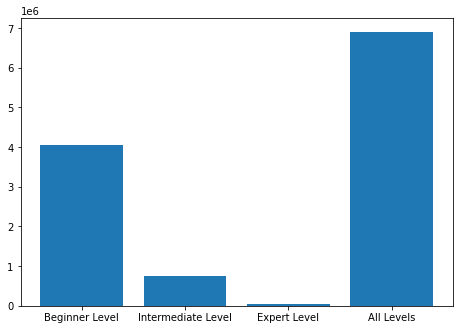

In [10]:
import matplotlib.pyplot as plt
import csv
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
Xaxis = ['Beginner Level', 'Intermediate Level', 'Expert Level', 'All Levels']
biglev = Data[Data['level']=='Beginner Level']['num_subscribers'].values.sum()
Intlev = Data[Data['level']=='Intermediate Level']['num_subscribers'].values.sum()
ExpLEv =Data[Data['level']=='Expert Level']['num_subscribers'].values.sum()
allLev =Data[Data['level']=='All Levels']['num_subscribers'].values.sum()
Yaxis=[biglev,Intlev,ExpLEv,allLev]
Graph1=[Xaxis,Yaxis]
ax.bar(Xaxis,Yaxis)

plt.show()
with open('Graphs/Graph1.csv', 'w', newline='') as myfile:
    wr = csv.writer(myfile, quoting=csv.QUOTE_ALL)
    for rows in Graph1: 
        wr.writerow(rows)

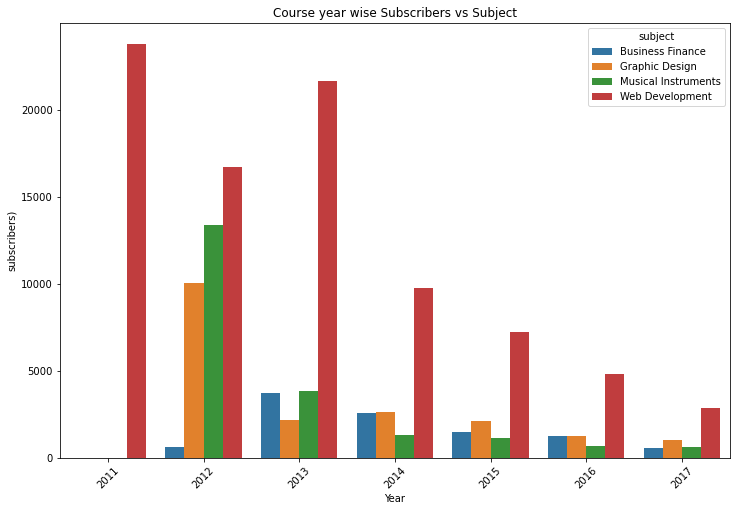

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Data['year']=pd.to_datetime(Data['published_timestamp']).dt.year

plt.figure(figsize=(12,8))
sns.barplot(x='year', y='num_subscribers', hue='subject', data=Data, ci=None)
plt.title('Course year wise Subscribers vs Subject')
plt.xlabel('Year')
plt.ylabel('subscribers)')
plt.xticks(rotation=45)
plt.show()

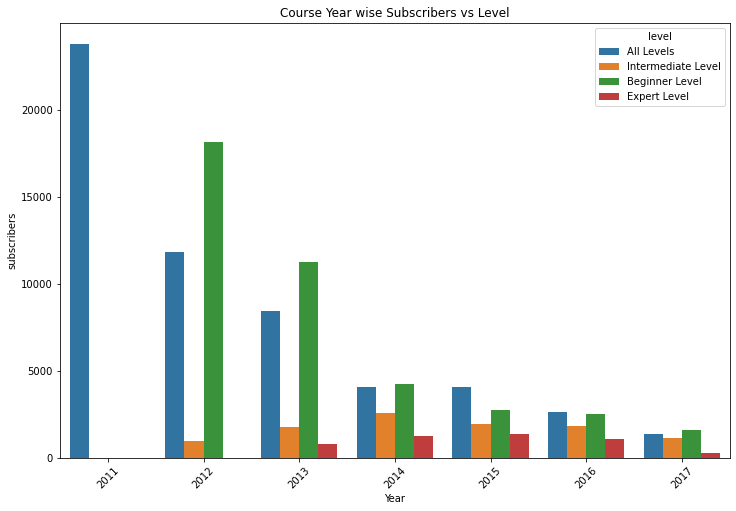

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
sns.barplot(x='year', y='num_subscribers', hue='level', data=Data, ci=None)
plt.title('Course Year wise Subscribers vs Level')
plt.xlabel('Year')
plt.ylabel('subscribers')
plt.xticks(rotation=45)
plt.show()

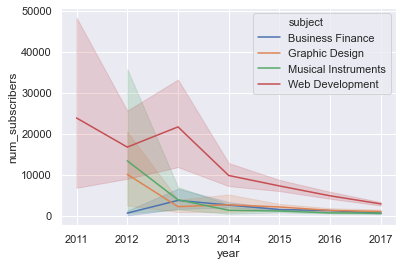

In [13]:
import seaborn as sns
sns.set(style="darkgrid")

# Plot the responses for different events and regions
sns.lineplot(x="year", y="num_subscribers",
             hue="subject",data=Data)

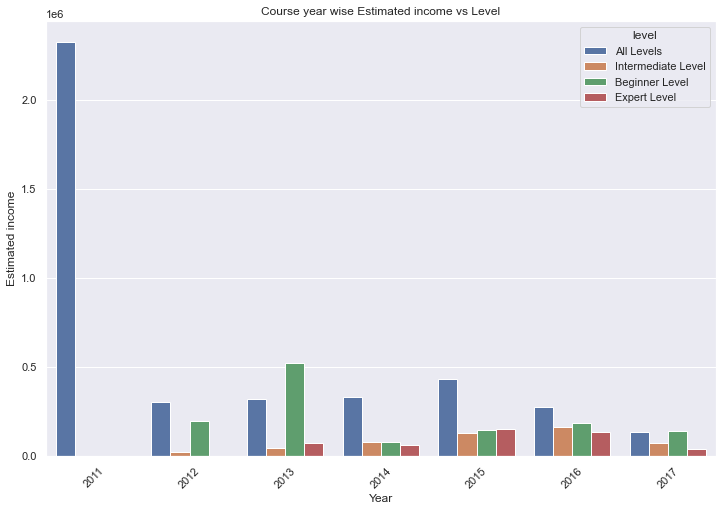

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
Data['estimated_income']=Data["price"]*Data["num_subscribers"]
plt.figure(figsize=(12,8))
sns.barplot(x='year', y='estimated_income', hue='level', data=Data, ci=None)
plt.title('Course year wise Estimated income vs Level')
plt.xlabel('Year')
plt.ylabel('Estimated income')
plt.xticks(rotation=45)
plt.show()

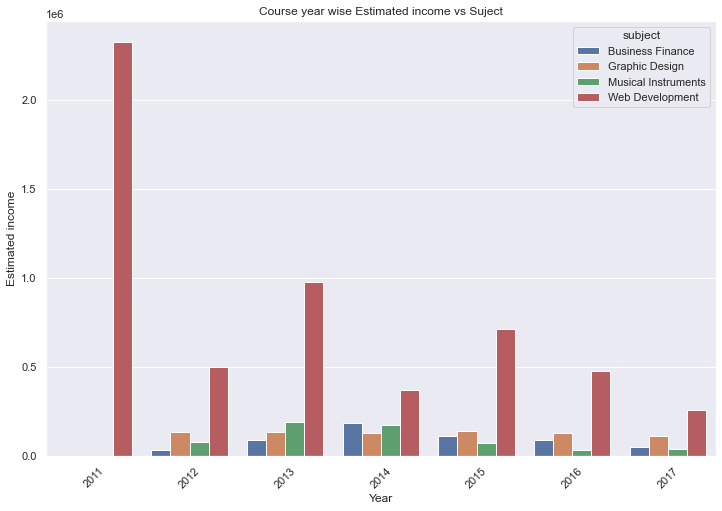

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
Data['estimated_income']=Data["price"]*Data["num_subscribers"]
plt.figure(figsize=(12,8))
sns.barplot(x='year', y='estimated_income', hue='subject', data=Data, ci=None)
plt.title('Course year wise Estimated income vs Suject')
plt.xlabel('Year')
plt.ylabel('Estimated income')
plt.xticks(rotation=45)
plt.show()